In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import gridspec
import scipy.ndimage as ndimage
import timeit

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache
# pandas for nice tables
import pandas as pd

## Load Data

In [4]:
mcc = MouseConnectivityCache(manifest_file='mcc/manifest.json', resolution=25)

In [5]:
av, _ = mcc.get_annotation_volume()
av.shape

(528, 320, 456)

In [6]:
tv, _ = mcc.get_template_volume()
tv.shape

(528, 320, 456)

In [7]:
center = np.array(tv.shape)/2.

## define a plane that indexes the volume: first, recreate coronal section 280

In [238]:
start_time = timeit.default_timer()

In [239]:
x0,x1 = 280,280
y0,y1 = 0,320
z0,z1 = 0,456


interpolate coordinates

In [240]:
num = np.sqrt((y1-y0)**2+(x1-x0)**2)
x = np.linspace(x0,x1,num)
y = np.linspace(y0,y1-1,num)
z = np.linspace(z0,z1-1,z1-z0)

reshape these coordinates into a 2D index array, where each entry along axis zero is an index into the CCF volume

In [241]:
index_array = np.array(np.meshgrid(x,y,z)).astype(int)[:,:,0,:]
index_array[0,:,:] = np.tile(x, (z.shape[0], 1)).transpose()

In [242]:
index_array.shape

(3, 320, 456)

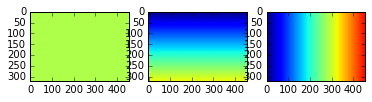

In [243]:
f,ax=plt.subplots(1,3)
for i in range(3):
    ax[i].imshow(index_array[i,:,:],clim=(0,500))

use the index_array calculates above to get the section from the CCF

In [244]:
section = ndimage.map_coordinates(tv,index_array)

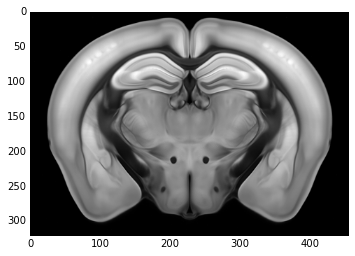

In [245]:
plt.imshow(section,cmap=plt.cm.gray)

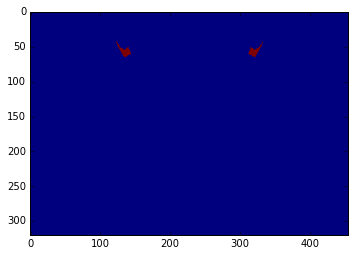

In [275]:
plt.imshow(av[280,:,:])

In [246]:
print str(timeit.default_timer() - start_time) + ' seconds'

9.08669996262 seconds


## now try  a rotation only in coronal

In [259]:
start_time = timeit.default_timer()

In [260]:
x0,x1 = 240,320
y0,y1 = 0,320
z0,z1 = 0,456


interpolate coordinates

In [261]:
num = np.sqrt((y1-y0)**2+(x1-x0)**2)
x = np.linspace(x0,x1,num)
y = np.linspace(y0,y1-1,num)
z = np.linspace(z0,z1-1,z1-z0)

reshape these coordinates into a 2D index array, where each entry along axis zero is an index into the CCF volume

In [262]:
index_array = np.array(np.meshgrid(x,y,z)).astype(int)[:,:,0,:]
index_array[0,:,:] = np.tile(x, (z.shape[0], 1)).transpose()

In [263]:
index_array.shape

(3, 329, 456)

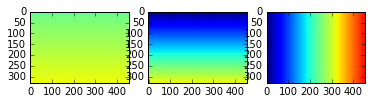

In [264]:
f,ax=plt.subplots(1,3)
for i in range(3):
    ax[i].imshow(index_array[i,:,:],clim=(0,500))

use the index_array calculates above to get the section from the CCF

In [270]:
section_t = ndimage.map_coordinates(tv,index_array)
section_a = ndimage.map_coordinates(av,index_array)

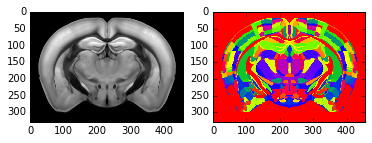

In [276]:
f,ax=plt.subplots(1,2)
ax[0].imshow(section_t,cmap=plt.cm.gray)
ax[1].imshow(section_a,cmap=plt.cm.prism,vmin=0,vmax=2000
            )

In [255]:
print str(timeit.default_timer() - start_time) + ' seconds'

8.11303305626 seconds
